### Recurrent Neural Networks (RNNs) are a type of neural network architecture that is particularly well-suited for tasks involving sequential data. Unlike feedforward neural networks, which process data in fixed-size chunks, RNNs can handle input sequences of arbitrary length.

#### key features of RNNs:

- Recurrent Connections: RNNs have recurrent connections that allow information to persist across different time steps in a sequence. This means that information from previous inputs is considered when processing the current input.

- Shared Parameters: The same set of weights and biases are applied at each time step. This allows the network to use the same computation for different elements of the sequence.

- Time Dependency: RNNs are well-suited for tasks where the order or temporal dependency of data matters, such as time series prediction, language modeling, and speech recognition.


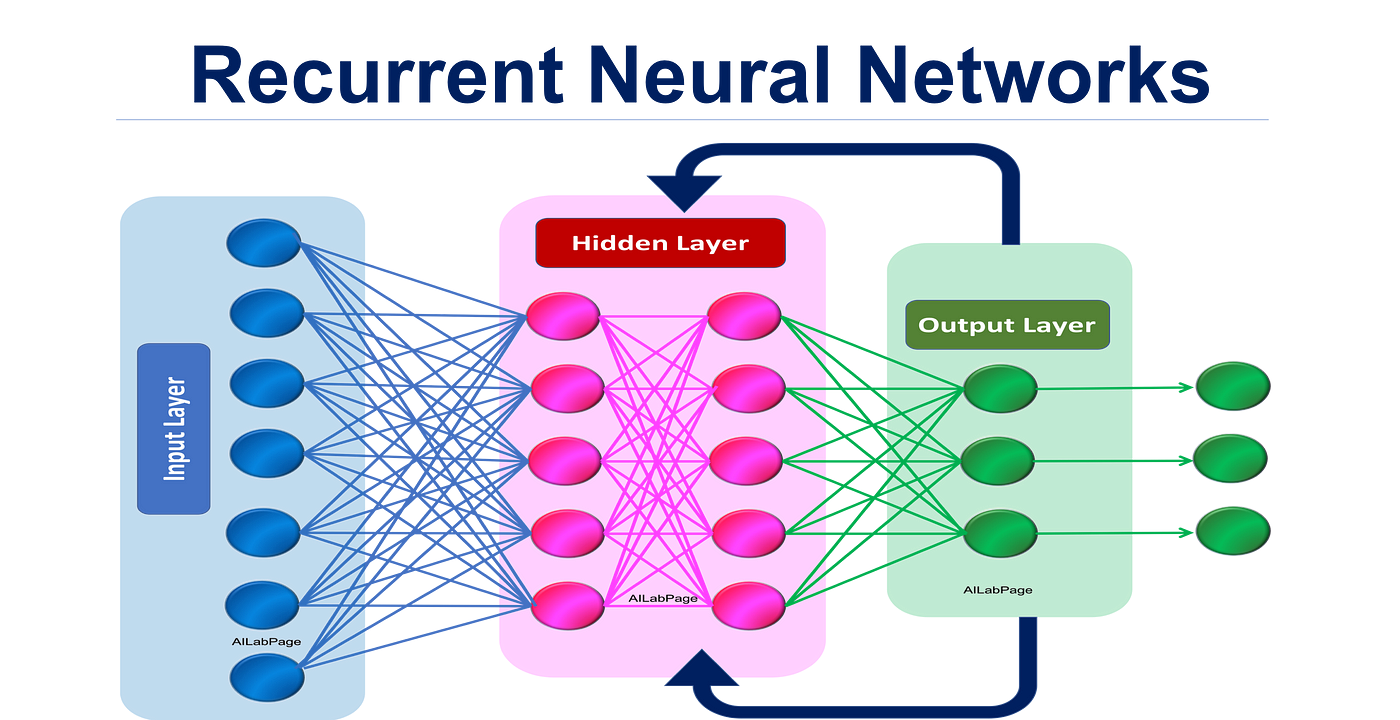
### Applications of RNNs:

- Language Modeling and Text Generation: RNNs can be used to model the probability distribution of sequences of words. This enables tasks like auto-completion, machine translation, and text generation.

- Time Series Prediction: RNNs are effective for tasks like stock price prediction, weather forecasting, and any scenario where the current state depends on previous states.

- Speech Recognition: RNNs can be used to convert spoken language into written text. This is crucial for applications like voice assistants (e.g., Siri, Alexa).

- Handwriting Recognition: RNNs can recognize handwritten text, enabling applications like digit recognition and signature verification.

- Image Captioning: RNNs can be combined with Convolutional Neural Networks (CNNs) to generate captions for images.

- Video Analysis: RNNs can process sequences of images or video frames, making them useful for tasks like action recognition, video captioning, and video prediction.

- Anomaly Detection: RNNs can be used to detect anomalies in sequences of data, making them valuable for tasks like fraud detection in finance or detecting defects in manufacturing.

- Sentiment Analysis: RNNs can analyze sequences of text to determine the sentiment expressed.


### Mathematical Implementation:

Terms:
- xt: Input at time step at t
- ht: Hidden state at time step at t
- Whx: Weight matrix for input-to-hidden connections
- Whh: Weight matrix for hidden-to-hidden connections
- bh:Bias term for hidden layer
- Wyh: Weight matrix for hidden-to-output connection
- by: Bias term for output layer

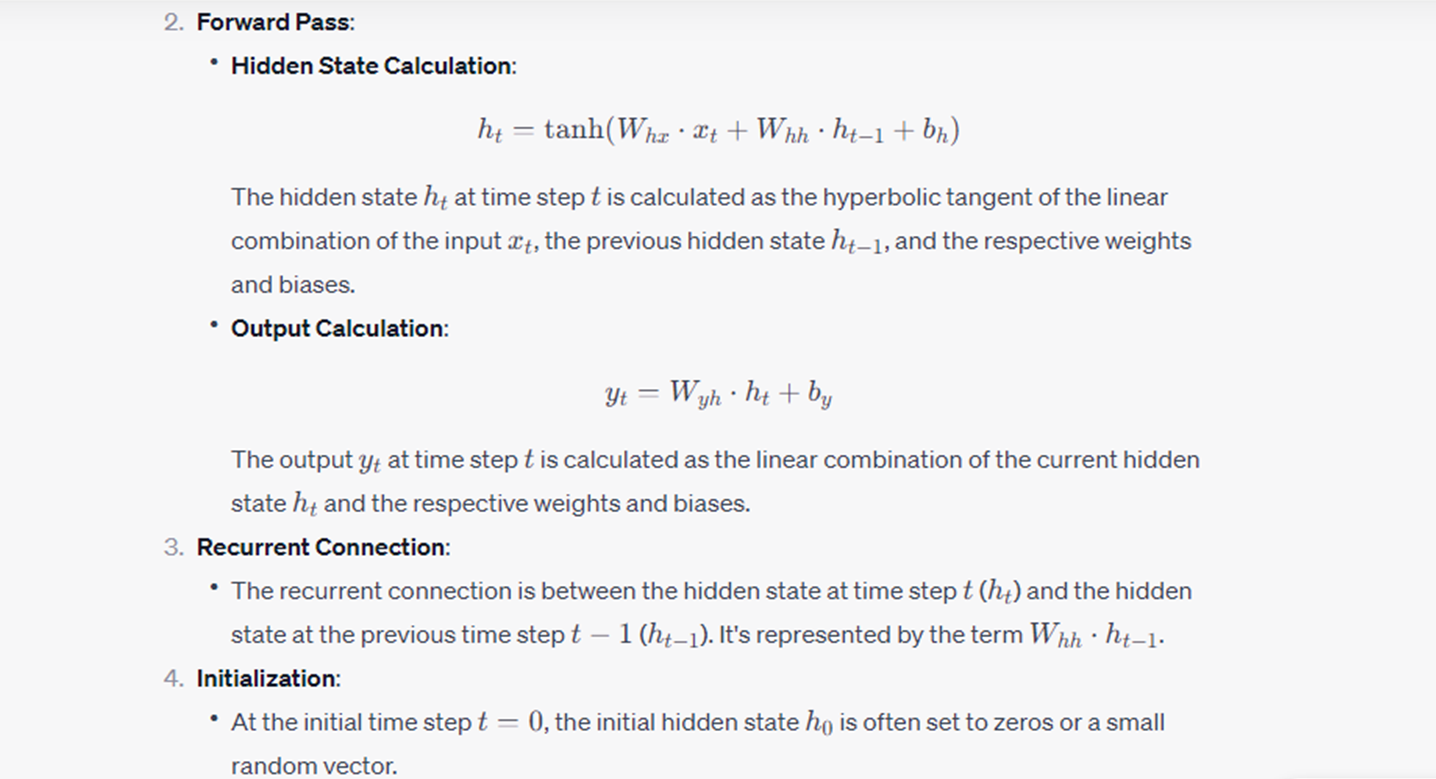



### Training:

During training, you would use backpropagation through time (BPTT) to compute gradients and update the weights and biases to minimize the loss function.
Prediction:

Once the network is trained, you can make predictions by passing a sequence of inputs through the network.
This is a basic mathematical interpretation of a simple RNN. In practice, more sophisticated variants like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are often used to address issues like vanishing gradients and better capture long-term dependencies.

### Below is a basic implementation of a simple RNN using only the NumPy library. This code demonstrates how you can manually perform forward passes through time.

In [ ]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hyperbolic tangent (tanh) activation function
def tanh(x):
    return np.tanh(x)

# Define the derivative of the tanh activation function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Define the RNN class
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W_hx = np.random.randn(hidden_size, input_size)
        self.W_hh = np.random.randn(hidden_size, hidden_size)
        self.W_yh = np.random.randn(output_size, hidden_size)
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))
        
    def forward(self, x):
        # Initialize hidden state
        h = np.zeros((self.W_hx.shape[0], 1))
        
        # Lists to store intermediate values
        self.h_states = []
        self.x_inputs = []
        
        for t in range(len(x)):
            # Update hidden state
            h = tanh(np.dot(self.W_hx, x[t]) + np.dot(self.W_hh, h) + self.b_h)
            self.h_states.append(h)
            self.x_inputs.append(x[t])
            
        # Calculate output
        y = np.dot(self.W_yh, h) + self.b_y
        
        return y, h
    
    def backward(self, x, y_true, learning_rate):
        # Initialize gradients
        dW_hx, dW_hh, dW_yh = np.zeros_like(self.W_hx), np.zeros_like(self.W_hh), np.zeros_like(self.W_yh)
        db_h, db_y = np.zeros_like(self.b_h), np.zeros_like(self.b_y)
        dh_next = np.zeros_like(self.h_states[0])
        
        for t in reversed(range(len(x))):
            # Compute gradients
            dy = y_true - x[t]
            dW_yh += np.dot(dy, self.h_states[t].T)
            db_y += dy
            dh = np.dot(self.W_yh.T, dy) + dh_next
            dh_raw = tanh_derivative(self.h_states[t]) * dh
            db_h += dh_raw
            dW_hx += np.dot(dh_raw, self.x_inputs[t].T)
            dW_hh += np.dot(dh_raw, self.h_states[t-1].T)
            dh_next = np.dot(self.W_hh.T, dh_raw)
        
        # Clip gradients to avoid exploding gradients (optional)
        for gradient in [dW_hx, dW_hh, dW_yh, db_h, db_y]:
            np.clip(gradient, -5, 5, out=gradient)
        
        # Update weights and biases
        self.W_hx -= learning_rate * dW_hx
        self.W_hh -= learning_rate * dW_hh
        self.W_yh -= learning_rate * dW_yh
        self.b_h -= learning_rate * db_h
        self.b_y -= learning_rate * db_y


### Explanation:

- The code defines a basic RNN class (SimpleRNN) with methods for forward pass (forward) and backward pass (backward).

- The activation functions (sigmoid and tanh) and their derivatives are defined.

- The forward method performs a forward pass through the RNN, storing intermediate values for backpropagation.

- The backward method computes gradients and updates the weights and biases using backpropagation through time (BPTT).

### Let us use Keras library to create and train a basic RNN for a toy example of sequence prediction. This example uses a very simple sequence (1, 2, 3, 4, 5) and tries to predict the next number in the sequence.



In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some sample data
X = np.array([[i+j for j in range(5)] for i in range(100)])
y = np.array([i+5 for i in range(100)])
y

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104])

In [23]:
X

array([[  0,   1,   2,   3,   4],
       [  1,   2,   3,   4,   5],
       [  2,   3,   4,   5,   6],
       [  3,   4,   5,   6,   7],
       [  4,   5,   6,   7,   8],
       [  5,   6,   7,   8,   9],
       [  6,   7,   8,   9,  10],
       [  7,   8,   9,  10,  11],
       [  8,   9,  10,  11,  12],
       [  9,  10,  11,  12,  13],
       [ 10,  11,  12,  13,  14],
       [ 11,  12,  13,  14,  15],
       [ 12,  13,  14,  15,  16],
       [ 13,  14,  15,  16,  17],
       [ 14,  15,  16,  17,  18],
       [ 15,  16,  17,  18,  19],
       [ 16,  17,  18,  19,  20],
       [ 17,  18,  19,  20,  21],
       [ 18,  19,  20,  21,  22],
       [ 19,  20,  21,  22,  23],
       [ 20,  21,  22,  23,  24],
       [ 21,  22,  23,  24,  25],
       [ 22,  23,  24,  25,  26],
       [ 23,  24,  25,  26,  27],
       [ 24,  25,  26,  27,  28],
       [ 25,  26,  27,  28,  29],
       [ 26,  27,  28,  29,  30],
       [ 27,  28,  29,  30,  31],
       [ 28,  29,  30,  31,  32],
       [ 29,  

In [24]:
# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [25]:

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])


In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=8)


Epoch 1/10
13/13 [==============================] - 2s 6ms/step - loss: 1814.8225
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 211.9403
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 59.4532
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 10.0549
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 4.6951
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 3.3915
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 2.2211
Epoch 8/10
13/13 [==============================] - 0s 10ms/step - loss: 2.0450
Epoch 9/10
13/13 [==============================] - 0s 11ms/step - loss: 1.8847
Epoch 10/10
13/13 [==============================] - 0s 12ms/step - loss: 1.9048


In [27]:

# Test the model
test_input = np.array([[i+j for j in range(5)] for i in range(100, 115)])
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 1))
predicted_output = model.predict(test_input)



1/1 [==============================] - 0s 349ms/step


In [28]:
test_input 

array([[[100],
        [101],
        [102],
        [103],
        [104]],

       [[101],
        [102],
        [103],
        [104],
        [105]],

       [[102],
        [103],
        [104],
        [105],
        [106]],

       [[103],
        [104],
        [105],
        [106],
        [107]],

       [[104],
        [105],
        [106],
        [107],
        [108]],

       [[105],
        [106],
        [107],
        [108],
        [109]],

       [[106],
        [107],
        [108],
        [109],
        [110]],

       [[107],
        [108],
        [109],
        [110],
        [111]],

       [[108],
        [109],
        [110],
        [111],
        [112]],

       [[109],
        [110],
        [111],
        [112],
        [113]],

       [[110],
        [111],
        [112],
        [113],
        [114]],

       [[111],
        [112],
        [113],
        [114],
        [115]],

       [[112],
        [113],
        [114],
        [115],
        [116]],


In [29]:

# Print the predicted output
print("Predicted Output:")
print(predicted_output.flatten())

Predicted Output:
[106.44789  107.489365 108.530846 109.57231  110.61378  111.65525
 112.696724 113.7382   114.77966  115.82114  116.8626   117.90408
 118.945564 119.987015 121.028496]


### Let's create a simple RNN using Keras with some sample data. In this example, we'll use a sequence of numbers to predict the next number in the sequence.

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [13]:
# Generate some sample data
np.random.seed(0)
sequence_length = 10
X = np.random.rand(100, sequence_length)
y = np.sum(X, axis=1)
# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [14]:
X

array([[[5.48813504e-01],
        [7.15189366e-01],
        [6.02763376e-01],
        [5.44883183e-01],
        [4.23654799e-01],
        [6.45894113e-01],
        [4.37587211e-01],
        [8.91773001e-01],
        [9.63662761e-01],
        [3.83441519e-01]],

       [[7.91725038e-01],
        [5.28894920e-01],
        [5.68044561e-01],
        [9.25596638e-01],
        [7.10360582e-02],
        [8.71292997e-02],
        [2.02183974e-02],
        [8.32619846e-01],
        [7.78156751e-01],
        [8.70012148e-01]],

       [[9.78618342e-01],
        [7.99158564e-01],
        [4.61479362e-01],
        [7.80529176e-01],
        [1.18274426e-01],
        [6.39921021e-01],
        [1.43353287e-01],
        [9.44668917e-01],
        [5.21848322e-01],
        [4.14661940e-01]],

       [[2.64555612e-01],
        [7.74233689e-01],
        [4.56150332e-01],
        [5.68433949e-01],
        [1.87898004e-02],
        [6.17635497e-01],
        [6.12095723e-01],
        [6.16933997e-01],
      

In [15]:
y

array([6.15766283, 5.47343366, 5.80251336, 5.55439698, 3.91024909,
       4.0865395 , 3.48130262, 4.62304009, 4.44328799, 3.74695784,
       5.81024204, 6.53739686, 5.12791992, 4.95242597, 6.83477713,
       4.62022506, 5.84404662, 3.82120161, 5.31708373, 3.94285671,
       4.22376337, 5.03551278, 6.29287132, 3.34543105, 4.12535925,
       6.18792818, 4.15987426, 7.58006614, 4.86551535, 5.14687668,
       3.65726133, 4.56957122, 3.51939496, 4.77330199, 4.31174913,
       4.59446004, 6.14973996, 5.62542232, 6.57445356, 3.50039149,
       4.90610262, 2.11582497, 5.79202376, 4.7204139 , 6.41570102,
       5.18882051, 4.01492958, 7.75099781, 4.46178554, 4.60571707,
       4.82743427, 5.30872776, 3.89559851, 4.48690479, 5.17260685,
       4.78322976, 7.29259289, 5.17293725, 3.35033172, 6.33248724,
       3.73595213, 4.98486419, 6.33594974, 4.55005736, 5.99637124,
       4.43103304, 4.84205917, 4.77009725, 4.61015796, 4.29541809,
       2.33640341, 4.39677098, 6.67577919, 3.75992457, 4.96975

In [16]:

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:


# Train the model
model.fit(X, y, epochs=10, batch_size=8)



Epoch 1/10
13/13 [==============================] - 2s 10ms/step - loss: 26.1947
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 22.5297
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 15.9407
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 3.5103
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5985
Epoch 6/10
13/13 [==============================] - 0s 11ms/step - loss: 0.2409
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1323
Epoch 8/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1077
Epoch 9/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1047
Epoch 10/10
1/1 [==============================] - 0s 326ms/step
Predicted Output: 4.6273394


In [19]:
# Test the model
test_input = np.random.rand(10).reshape((1, sequence_length, 1))
predicted_output = model.predict(test_input)

test_input 

1/1 [==============================] - 0s 43ms/step


array([[[0.23583422],
        [0.6204999 ],
        [0.63962224],
        [0.9485403 ],
        [0.77827617],
        [0.84834527],
        [0.49041991],
        [0.18534859],
        [0.99581529],
        [0.12935576]]])

In [20]:


# Print the predicted output
print("Predicted Output:", predicted_output[0, 0])


Predicted Output: 6.0044985
